# 데이터 가져오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
BUSUL=pd.read_csv("C:/Users/user/Desktop/Gwangjingu/서울특별시 광진구_공영 민영 주차장 통합_20221227/busul.csv", encoding='UTF-8')
NOOE=pd.read_csv("C:/Users/user/Desktop/Gwangjingu/서울특별시 광진구_공영 민영 주차장 통합_20221227/nooe.csv", encoding='UTF-8')
NOSANG=pd.read_csv("C:/Users/user/Desktop/Gwangjingu/서울특별시 광진구_공영 민영 주차장 통합_20221227/nosang.csv", encoding='UTF-8')
CAR=pd.read_csv("C:/Users/user/Desktop/Gwangjingu/Car.csv", encoding='cp949')
CCTV=pd.read_csv("C:/Users/user/Desktop/Gwangjingu/cctv.csv", encoding='cp949')
DANSOK=pd.read_csv("C:/Users/user/Desktop/Gwangjingu/dansok.csv", encoding='cp949')



## 1. 불법주정차 단속현황

In [3]:
DANSOK.columns

Index(['단속일시', '과태료', '단속지역', '단속장소', '위반내용', '견인지시', '단속구분'], dtype='object')

### 필요없는 항목 제거

In [4]:
DANSOK.drop(['단속일시','과태료', '위반내용', '견인지시','단속장소'], axis=1, inplace=True)

In [5]:
DANSOK.dropna(axis='index',how='any', inplace=True)
DANSOK.isnull().sum()

단속지역    0
단속구분    0
dtype: int64

In [6]:
DANSOK

,단속지역,단속구분
0,화양동,PDA
1,화양동,CCTV
2,구의동,CCTV
3,화양동,CCTV
4,화양동,CCTV
...,...,...
503295,중곡동,스마트앱(서울시)
503296,광장동,안전신문고(행안부)
503297,중곡동,PDA
503298,중곡동,PDA


### 상위 7개 동 불법주정차단속횟수

In [7]:
value_counts=DANSOK['단속지역'].value_counts()
value_counts.nlargest(7)

구의동    119364
자양동     95549
중곡동     83843
화양동     51434
광장동     46572
군자동     35612
능동      16350
Name: 단속지역, dtype: int64

### 추출된 7개 동 변수 설정

In [8]:
GJ=DANSOK.loc[DANSOK['단속지역']=='광장동']
GE=DANSOK.loc[DANSOK['단속지역']=='구의동']
GJA=DANSOK.loc[DANSOK['단속지역']=='군자동']
NE=DANSOK.loc[DANSOK['단속지역']=='능동']
JY=DANSOK.loc[DANSOK['단속지역']=='자양동']
JG=DANSOK.loc[DANSOK['단속지역']=='중곡동']
HY=DANSOK.loc[DANSOK['단속지역']=='화양동']

print(GJ)
print(GE)
print(GJA)
print(NE)
print(JY)
print(JG)
print(HY)

       단속지역        단속구분
105     광장동         PDA
123     광장동         PDA
231     광장동     주행형CCTV
232     광장동     주행형CCTV
240     광장동     주행형CCTV
...     ...         ...
503232  광장동     고정형CCTV
503247  광장동         PDA
503291  광장동  안전신문고(행안부)
503292  광장동  안전신문고(행안부)
503296  광장동  안전신문고(행안부)

[46572 rows x 2 columns]
       단속지역     단속구분
2       구의동     CCTV
6       구의동     CCTV
7       구의동     CCTV
8       구의동     CCTV
9       구의동     CCTV
...     ...      ...
503270  구의동      PDA
503282  구의동  고정형CCTV
503285  구의동      PDA
503288  구의동  고정형CCTV
503289  구의동  고정형CCTV

[119364 rows x 2 columns]
       단속지역     단속구분
86      군자동  주행형CCTV
87      군자동  주행형CCTV
88      군자동  주행형CCTV
106     군자동      PDA
109     군자동      PDA
...     ...      ...
503184  군자동      PDA
503187  군자동  고정형CCTV
503240  군자동      PDA
503260  군자동  고정형CCTV
503299  군자동      PDA

[35612 rows x 2 columns]
       단속지역     단속구분
15       능동      PDA
22       능동     CCTV
42       능동      PDA
157      능동      PDA
300      능동      PDA
...

## 2. 동 별 주행형CCTV, PDA 단속횟수 파악

In [9]:
GJ_L=len(GJ.loc[GJ['단속구분']=='주행형CCTV'])
GE_L=len(GE.loc[GE['단속구분']=='주행형CCTV'])
GJA_L=len(GJA.loc[GJA['단속구분']=='주행형CCTV'])
NE_L=len(NE.loc[NE['단속구분']=='주행형CCTV'])
JY_L=len(JY.loc[JY['단속구분']=='주행형CCTV'])
JG_L=len(JG.loc[JG['단속구분']=='주행형CCTV'])
HY_L=len(HY.loc[HY['단속구분']=='주행형CCTV'])

print('광장동 주행형CCTV 횟수 : ',GJ_L)
print('구의동 주행형CCTV 횟수 : ',GE_L)
print('군자동 주행형CCTV 횟수 : ',GJA_L)
print('능동 주행형CCTV 횟수 : ',NE_L)
print('자양동 주행형CCTV 횟수 : ',JY_L)
print('중곡동 주행형CCTV 횟수 : ',JG_L)
print('화양동 주행형CCTV 횟수 : ',HY_L)

광장동 주행형CCTV 횟수 :  16440
구의동 주행형CCTV 횟수 :  8320
군자동 주행형CCTV 횟수 :  8330
능동 주행형CCTV 횟수 :  67
자양동 주행형CCTV 횟수 :  13323
중곡동 주행형CCTV 횟수 :  1986
화양동 주행형CCTV 횟수 :  6941


In [10]:
GJ_P=len(GJ.loc[GJ['단속구분']=='PDA'])
GE_P=len(GE.loc[GE['단속구분']=='PDA'])
GJA_P=len(GJA.loc[GJA['단속구분']=='PDA'])
NE_P=len(NE.loc[NE['단속구분']=='PDA'])
JY_P=len(JY.loc[JY['단속구분']=='PDA'])
JG_P=len(JG.loc[JG['단속구분']=='PDA'])
HY_P=len(HY.loc[HY['단속구분']=='PDA'])

print('광장동 PDA 횟수 : ',GJ_L)
print('구의동 PDA 횟수 : ',GE_P)
print('군자동 PDA 횟수 : ',GJA_P)
print('능동 PDA 횟수 : ',NE_P)
print('자양동 PDA 횟수 : ',JY_P)
print('중곡동 PDA 횟수 : ',JG_P)
print('화양동 PDA 횟수 : ',HY_P)

광장동 PDA 횟수 :  16440
구의동 PDA 횟수 :  38406
군자동 PDA 횟수 :  14553
능동 PDA 횟수 :  7225
자양동 PDA 횟수 :  38756
중곡동 PDA 횟수 :  24694
화양동 PDA 횟수 :  19869


In [11]:
cctv_num = pd.DataFrame({'동': ['광장동', '구의동', '군자동', '능동', '자양동', '중곡동', '화양동'],
                         'CCTV수' : [16440,8320,8330,67,13323,1986,6941]
                       })
pda_num = pd.DataFrame({'동' : ['광장동', '구의동', '군자동', '능동', '자양동', '중곡동', '화양동'],
                       'pda수' : [16440,38406,14553,7225,38756,24694,19869]
                       })

In [12]:
A = GJ.loc[GJ['단속구분']=='주행형CCTV']
B = GE.loc[GE['단속구분']=='주행형CCTV']
C = GJA.loc[GJA['단속구분']=='주행형CCTV']
D = NE.loc[NE['단속구분']=='주행형CCTV']
E = JY.loc[JY['단속구분']=='주행형CCTV']
F = JG.loc[JG['단속구분']=='주행형CCTV']
G = HY.loc[HY['단속구분']=='주행형CCTV']
CCTV_dansok = pd.concat([A,B,C,D,E,F,G])
CCTV_dansok

,단속지역,단속구분
231,광장동,주행형CCTV
232,광장동,주행형CCTV
240,광장동,주행형CCTV
241,광장동,주행형CCTV
242,광장동,주행형CCTV
...,...,...
500957,화양동,주행형CCTV
502013,화양동,주행형CCTV
502014,화양동,주행형CCTV
502852,화양동,주행형CCTV


### 주차장 별 데이터 확인 

#### BUSUL

In [13]:
BUSUL.rename(columns={'주차장이름(pl_nm)':'주차장이름'},inplace=True)
BUSUL.rename(columns={'경도(logitude)': '경도'}, inplace =True)
BUSUL.rename(columns={'위도(latitude)': '위도'}, inplace = True)

BUSUL = BUSUL[['주차장이름', '위도', '경도']]
BUSUL['타입'] ='A'
BUSUL.head(3)

,주차장이름,위도,경도,타입
0,능동로32길 073-00 주차장,37.554053,127.082462,A
1,M캐슬 가을 주차장,37.553433,127.081944,A
2,능동로32길 106-05 주차장,37.553057,127.083952,A


#### NOOE

In [14]:
NOOE.rename(columns={'주차장이름(pl_nm)':'주차장이름'},inplace=True)
NOOE.rename(columns={'경도(longitude)': '경도'}, inplace =True)
NOOE.rename(columns={'위도(latitude)': '위도'}, inplace = True)

NOOE = NOOE[['주차장이름', '위도', '경도']]
NOOE['타입'] ='B'
NOOE.head(3)

,주차장이름,위도,경도,타입
0,중곡2동주차장,37.556402,127.084000,B
1,새오름,37.561311,127.090848,B
2,중곡4동주차장,37.557057,127.091839,B


#### NOSANG

In [15]:
NOSANG.rename(columns={'지번주차장이름(pl_nm)':'주차장이름'},inplace=True)
NOSANG.rename(columns={'경도(longitude)': '경도'}, inplace =True)
NOSANG.rename(columns={'위도(latitude)': '위도'}, inplace = True)

NOSANG = NOSANG[['주차장이름', '위도', '경도']]
NOSANG['타입'] ='C'
NOSANG.head(3)

,주차장이름,위도,경도,타입
0,249-6 노상주차장,37.555295,127.077648,C
1,16-81 노상주차장,37.544867,127.069443,C
2,16-93 노상주차장,37.544947,127.069553,C


#### 주차장 통합

In [16]:
PAKING = pd.concat([BUSUL, NOOE, NOSANG])
PAKING.dropna(inplace=True)

In [17]:
PAKING.isnull().sum()

주차장이름    0
위도       0
경도       0
타입       0
dtype: int64

In [18]:
PAKING_NUM = pd.DataFrame({'동': ['광장동', '구의동', '군자동', '능동', '자양동', '중곡동', '화양동'],
                         '주차장수' : [528, 3720, 1130, 990, 4538, 6229, 1298]
                       })

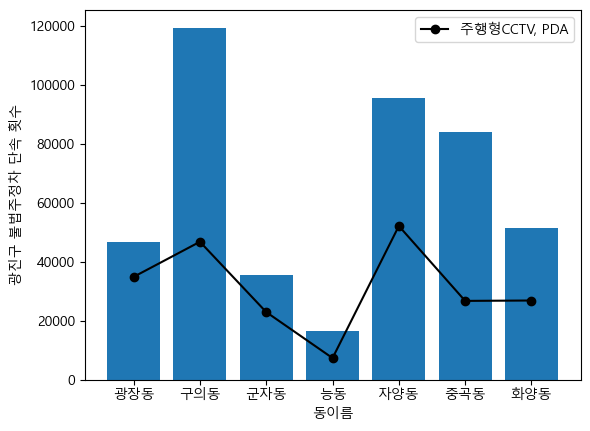

In [19]:
import matplotlib.pyplot as plt
# 한글 깨짐으로 인한 한글 지원가능한 폰트로 바꾸는 코드
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
#-----------------------------------------------------------------------------------------------



list_x = ['광장동', '구의동', '군자동', '능동', '자양동', '중곡동', '화양동']
all_y = [len(GJ),len(GE),len(GJA), len(NE), len(JY), len(JG), len(HY)]
list_y=[GJ_L+GJ_P, GE_L+GE_P, GJA_L+GJA_P, NE_L+NE_P, JY_L+JY_P, JG_L+JG_P, HY_L+HY_P]


plt.plot(list_x, list_y, color='black', marker='o',label="주행형CCTV, PDA")
plt.bar(list_x, all_y)

plt.xlabel('동이름')
plt.ylabel('광진구 불법주정차 단속 횟수')
plt.legend()


plt.show()

# 고정형CCTV 설치위치 시각화

In [20]:
CCTV.columns

Index(['고정형CCTV지번주소', '위도', '경도', '자치구', '단속지점명', '현장구분'], dtype='object')

### 필요없는 항목 제거

In [21]:
#CCTV.drop(['자치구', '현장구분', '단속지점명'], axis=1, inplace=True)
CCTV.drop(['현장구분', '단속지점명'], axis=1, inplace=True)

In [22]:
CCTV.dropna(axis='index', how='any', inplace=True)
CCTV.isnull().sum()

고정형CCTV지번주소    0
위도             0
경도             0
자치구            0
dtype: int64

CCTV

### 광진구 지도 시각화

In [1]:
import folium as f
from folium.plugins import MarkerCluster

m = f.Map(location=[37.53573, 127.0845333],
                tiles='OpenStreetMap',
                zoom_start=13.4)
mc=MarkerCluster()
for _, row in CCTV.iterrows():
    mc.add_child(
        f.Marker(location=[row['위도'],row['경도']],
          popup=row['고정형CCTV지번주소']
              )
    )
    
m.add_child(mc)
m.add_child(f.LatLngPopup())

m

## 광진구 동별 CCTV 단속 횟수

import json
Gjson2 = "C:/Users/user/Desktop/Gwangjingu/gwang3.json"
Gjson_geo = json.load(open(Gjson2, encoding ='utf-8'))

m = f.Map(location=[37.53573, 127.084533],
         tiles = 'openstreetmap',
        zoom_start = 14
         )

fmap = f.Choropleth(geo_data = Gjson_geo,
                   data = cctv_num,
                    columns =['동', 'CCTV수'],
                    key_on = 'feature.properties.temp', fill_color='PuRd',
                    fill_opacity = 0.7, line_pacity=0.3,
                    legend_name = '동 별 CCTV 단속 횟수',
                    highlight =True
                   ).add_to(m)
fmap.geojson.zoom_on_click = False
fmap.geojson.add_child(f.features.GeoJsonTooltip(['temp'],labels=False))

m


### 광진구 동별 PDA 수

import json
Gjson2 = "C:/Users/user/Desktop/Gwangjingu/gwang3.json"
Gjson_geo = json.load(open(Gjson2, encoding ='utf-8'))

m = f.Map(location=[37.53573, 127.084533],
         tiles = 'openstreetmap',
        zoom_start = 14
         )

fmap = f.Choropleth(geo_data = Gjson_geo,
                   data = pda_num,
                    columns =['동', 'pda수'],
                    key_on = 'feature.properties.temp', fill_color='PuRd',
                    fill_opacity = 0.7, line_pacity=0.3,
                    legend_name = '동 별 CCTV 수',
                    highlight =True
                   ).add_to(m)
fmap.geojson.zoom_on_click = False
fmap.geojson.add_child(f.features.GeoJsonTooltip(['temp'],labels=False))

m


### 동별 자동차 등록대수

Gjson2 = "C:/Users/user/Desktop/Gwangjingu/gwang2.json"
Gjson_geo = json.load(open(Gjson2, encoding ='utf-8'))

m = f.Map(location=[37.53573, 127.084533],
         tiles = 'openstreetmap',
        zoom_start = 14
         )

fmap = f.Choropleth(geo_data = Gjson_geo,
                   data = CAR,
                    columns =['읍면동명', '자동차등록대수'],
                    key_on = 'feature.properties.temp', fill_color='PuRd',
                    fill_opacity = 0.7, line_pacity=0.3,
                    legend_name = '동 별 자동차등록대수',
                    highlight =True
                   ).add_to(m)
fmap.geojson.zoom_on_click = False
fmap.geojson.add_child(f.features.GeoJsonTooltip(['temp'],labels=False))

m


### 주차장 별 위치

m = f.Map(location=[37.53573, 127.0845333],
                tiles='OpenStreetMap',
                zoom_start=13.4)
mc=MarkerCluster()
for _, row in PAKING.iterrows():
    if row['타입'] == 'A':
        color = 'red'
    elif row['타입'] == 'B':
        color = 'blue'
    elif row['타입'] == 'C':
        color = 'green'
        
    mc.add_child(
        f.Marker(location=[row['위도'],row['경도']],
          popup=row['주차장이름'], icon=f.Icon(color = color)
              )
    )
    
    
m.add_child(mc)
m.add_child(f.LatLngPopup())

m

### 동 별 주차장 수 비교

Gjson2 = "C:/Users/user/Desktop/Gwangjingu/gwang3.json"
Gjson_geo = json.load(open(Gjson2, encoding ='utf-8'))

m = f.Map(location=[37.53573, 127.084533],
         tiles = 'openstreetmap',
        zoom_start = 14
         )

fmap = f.Choropleth(geo_data = Gjson_geo,
                   data = PAKING_NUM,
                    columns =['동', '주차장수'],
                    key_on = 'feature.properties.temp', fill_color='PuRd',
                    fill_opacity = 0.7, line_pacity=0.3,
                    legend_name = '동 별 주차장 수 ',
                    highlight =True
                   ).add_to(m)
fmap.geojson.zoom_on_click = False
fmap.geojson.add_child(f.features.GeoJsonTooltip(['temp'],labels=False))

m
